In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import time

#### Posizionamento sensori di temperatura HVLVPS

##### CRATE_2 (odd layers)
- **HVLV_odds_bracket_R**: sensore installato sulla bracket ad "L" a *destra* che collega crate a frame e-bay

- **HVLV_odds_A**: sensore installato sul lato in cui è installata la scheda di power input

- **HVLV_odds_B**: sensore installato sul lato opposto a quello in cui è installata la scheda di power input

- **HVLVPS CRATE_2 LV_1-1** + **HVLVPS CRATE_2 LV_1-2** <br><br>
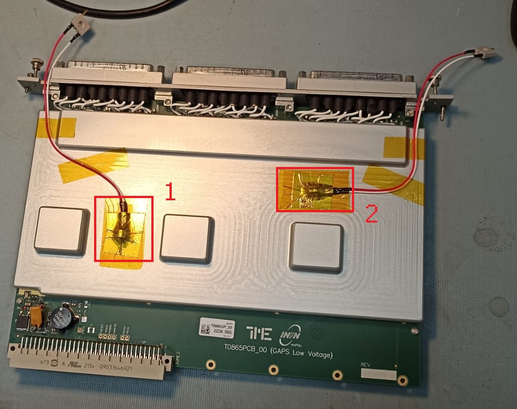

- **HVLVPS CRATE_2 HV_1** <br><br>
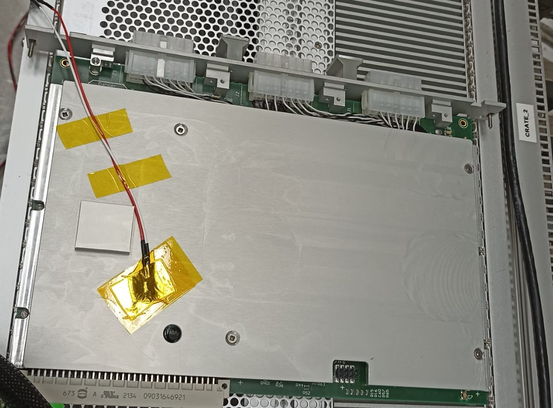

- **HVLVPS CRATE_2 LV_6-1** + **HVLVPS CRATE_2 LV_6-2** <br><br>
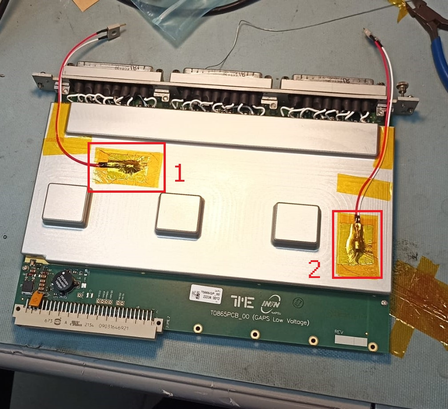

- **HVLVPS CRATE_2 MAIN_2** <br><br>
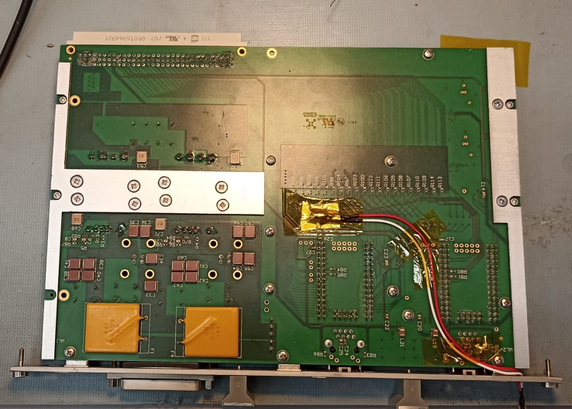 <br>

##### CRATE_1 (even layers)
- **HVLV_evens_bracket_L**: sensore installato sulla bracket ad "L" a *sinistra* che collega crate a frame e-bay

- **HVLV_evens_bracket_R**: sensore installato sulla bracket ad "L" a *destra* che collega crate a frame e-bay

- **HVLV_even_A**: sensore installato sul lato in cui è installata la scheda di power input

- **HVLV_even_B**: sensore installato sul lato opposto a quello in cui è installata la scheda di power input

- **HVLVPS CRATE_1 LV_1-1** + **HVLVPS CRATE_1 LV_1-2** <br><br>
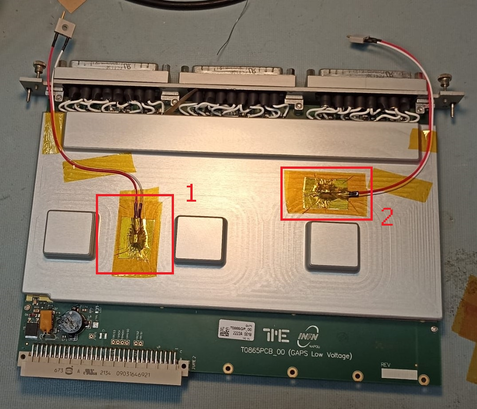 <br><br>

##### Posizionamento bracket (esemplificativo)
Sensore di temperatura installato sulla parte a contatto con e-bay. <br><br>
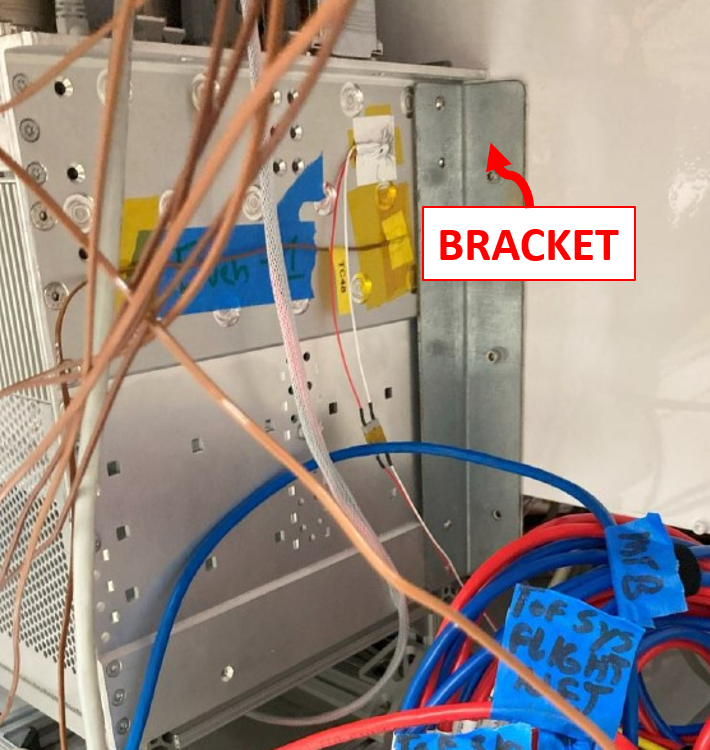

In [2]:
# Figure size
matplotlib.rcParams["figure.figsize"] = 1.618 * 10, 1 * 5

Convert temperature data into temperature values [°C]

In [3]:
def temp_converter(data):
    for i in range(len(data)):
        data[i] = 100*data[i] - 273.15

    return data

#### Import labjack data for Test 2 (cold + hot case)

Cold case <br>
Start: 18/06/2023 (including rampdown) <br>
 Stop: 21/06/2023 9:00 AM

Hot case <br>
Start: 21/06/2023 9:00 AM <br>
 Stop: 21/06/2023 9:44 AM

In [4]:
colnames = ["gcutime", "HVLV_evens_bracket_L", "HVLV_evens_bracket_R", "HVLV_evens_LV1-2", "HVLV_HVLV_evens_LV1-1", "HVLV_oddsHV_1", "HVLV_odds_LV6-1", "HVLV_odds_bracket_R", "HVLV_odds_main2", "HVLV_odds_LV6-2", "HVLV_odds_LV1-2", "odds_LV1-1", "HVLV_odds_A", "HVLV_odds_B", "HVLV_even_A", "HVLV_even_B"]
data_HVLVPS = pd.read_csv(r"dati_test2_noheader.csv", header = None, names = colnames)
print(data_HVLVPS)

             gcutime  HVLV_evens_bracket_L  HVLV_evens_bracket_R  \
0       1.686628e+09              3.068129              3.077757   
1       1.686628e+09              3.068050              3.077757   
2       1.686628e+09              3.068286              3.077915   
3       1.686628e+09              3.068365              3.077994   
4       1.686628e+09              3.068286              3.077994   
...              ...                   ...                   ...   
333163  1.687457e+09              2.919356              2.933010   
333164  1.687457e+09              2.919514              2.933089   
333165  1.687457e+09              2.919514              2.933168   
333166  1.687457e+09              2.919514              2.933168   
333167  1.687457e+09              2.919593              2.933247   

        HVLV_evens_LV1-2  HVLV_HVLV_evens_LV1-1  HVLV_oddsHV_1  \
0               0.837334               5.005009       5.006667   
1               0.839780               5.004930    

Definizione timestamp e conversione datetime to timestamp

In [20]:
LA_rome_diff = 9 * 3600 # secondi di differenza per 9 ore di fuso orario

min_date = "18/06/2023"
min_timestamp = time.mktime(datetime.strptime(min_date, "%d/%m/%Y").timetuple()) - LA_rome_diff

print(min_date)
print(min_timestamp)

max_datetime = datetime(2023, 6, 23)
max_timestamp = max_datetime.timestamp() - LA_rome_diff

print(max_datetime)
print(max_timestamp)

18/06/2023
1687006800.0
2023-06-23 00:00:00
1687438800.0


Filtraggio dati tra inizio Test 2 (18/06) e termine (21/06)

In [21]:
# Array dei timestamp
timestamp_array = data_HVLVPS.gcutime[(data_HVLVPS.gcutime > min_timestamp) & (data_HVLVPS.gcutime < max_timestamp)].to_numpy()

# Array dei datetime
datetime_array = []

# Conversione timestamp to datetime
for i in timestamp_array:
    datetime_array.append([datetime.fromtimestamp(i - LA_rome_diff)])

### Plot dati sensori su intero range Test 2

HVLV_evens_bracket_L


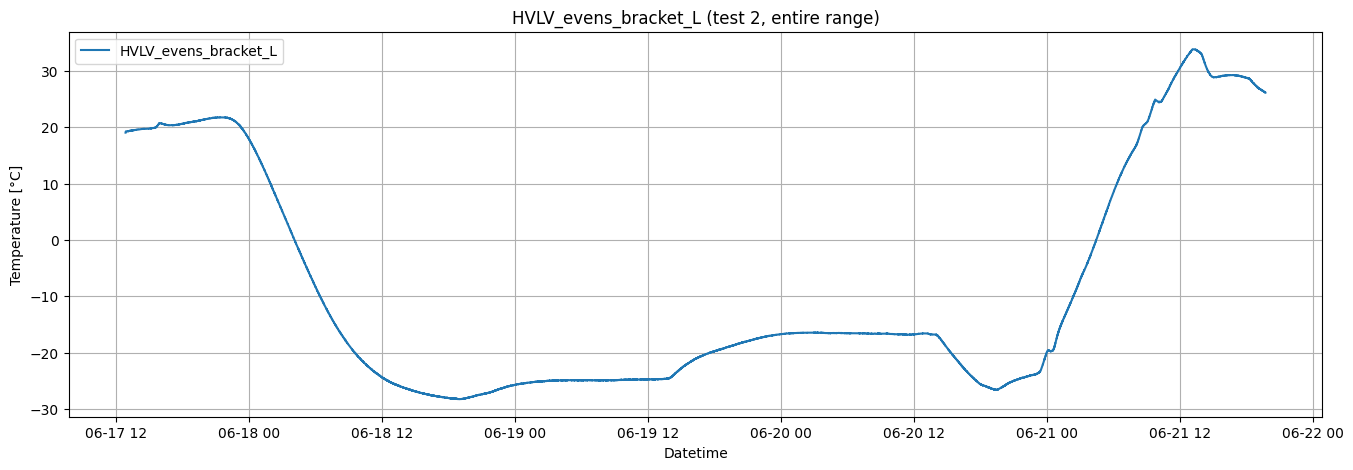

HVLV_evens_bracket_R


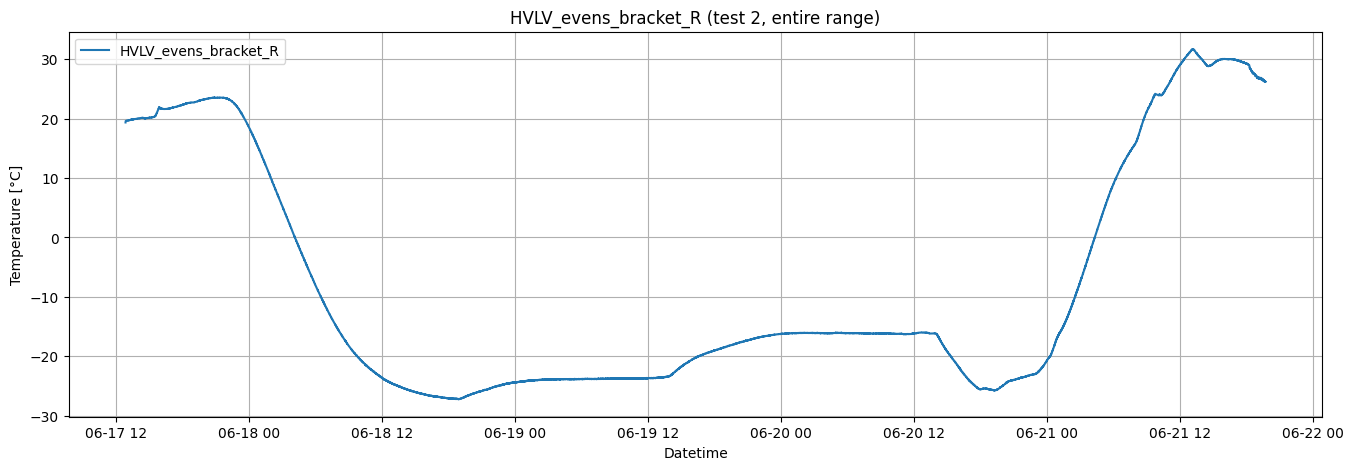

HVLV_evens_LV1-2


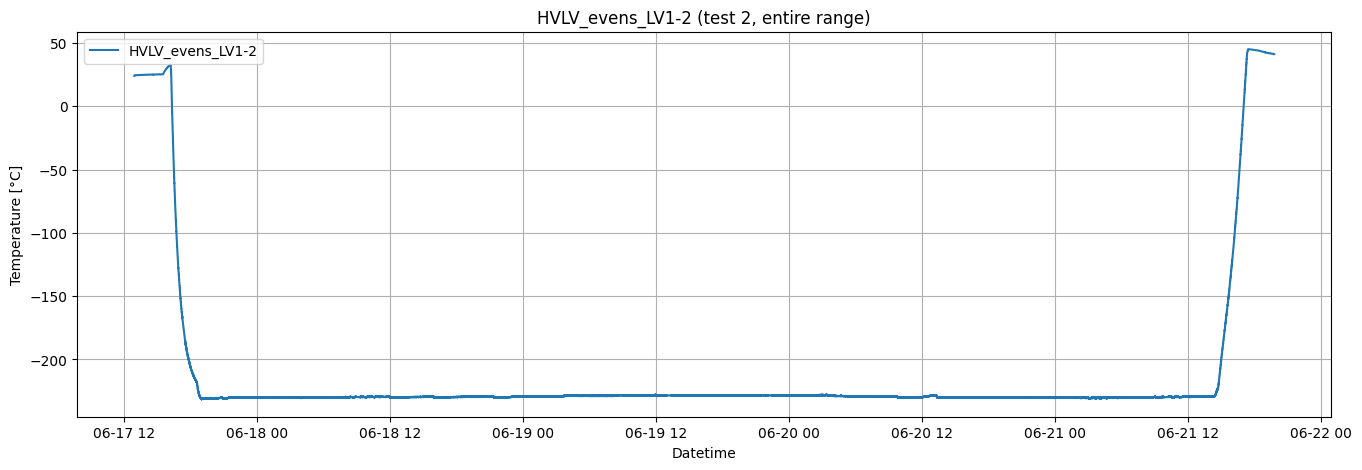

HVLV_HVLV_evens_LV1-1


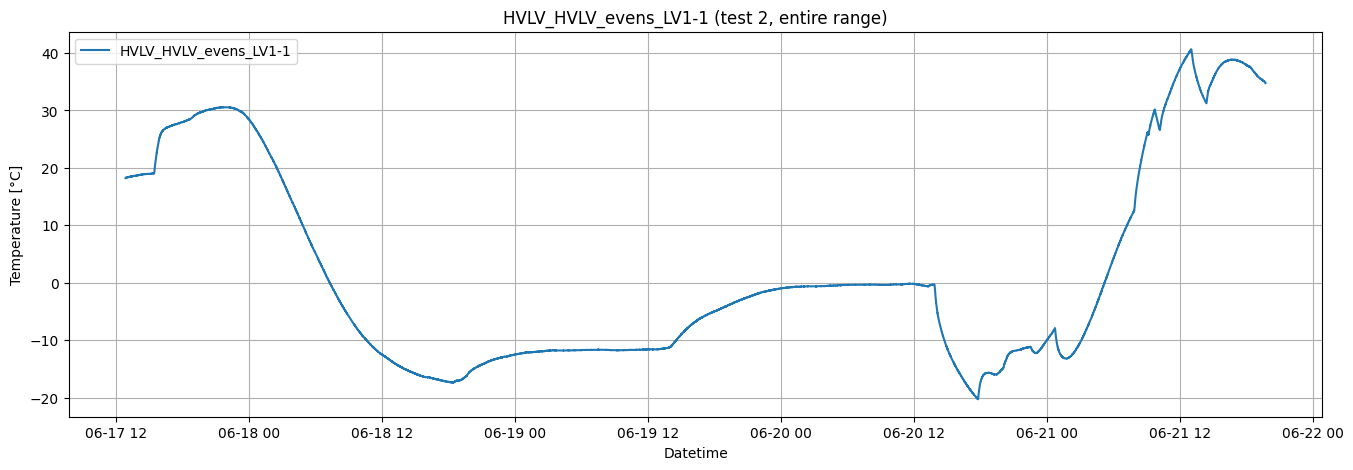

HVLV_oddsHV_1


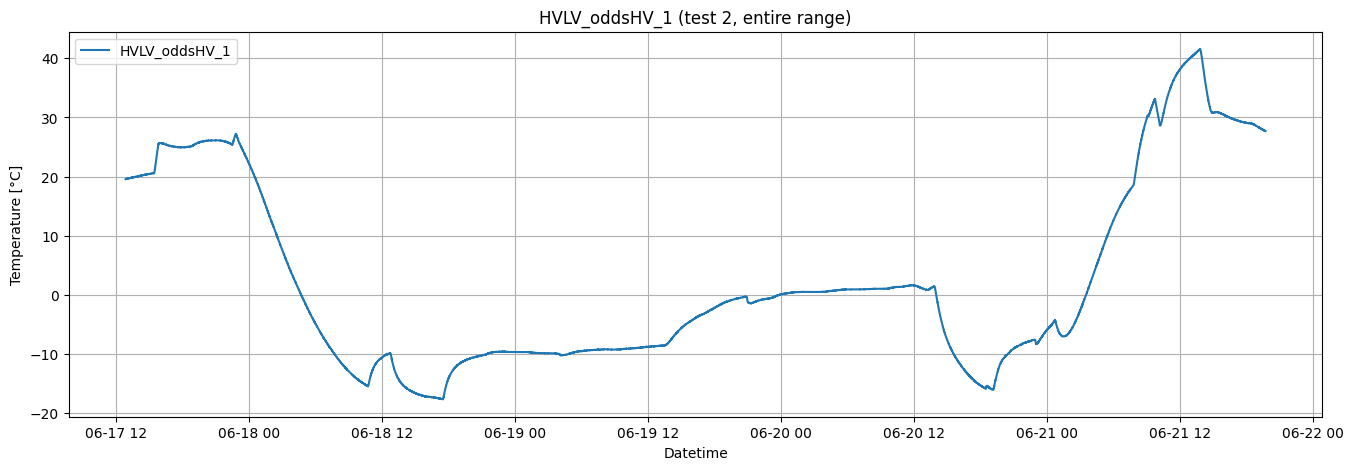

HVLV_odds_LV6-1


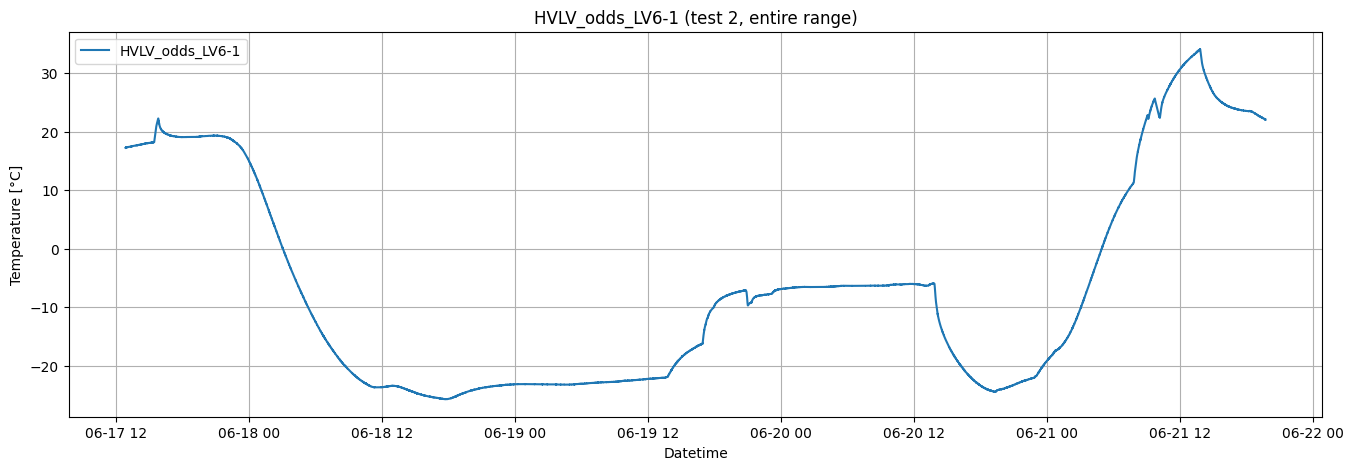

HVLV_odds_bracket_R


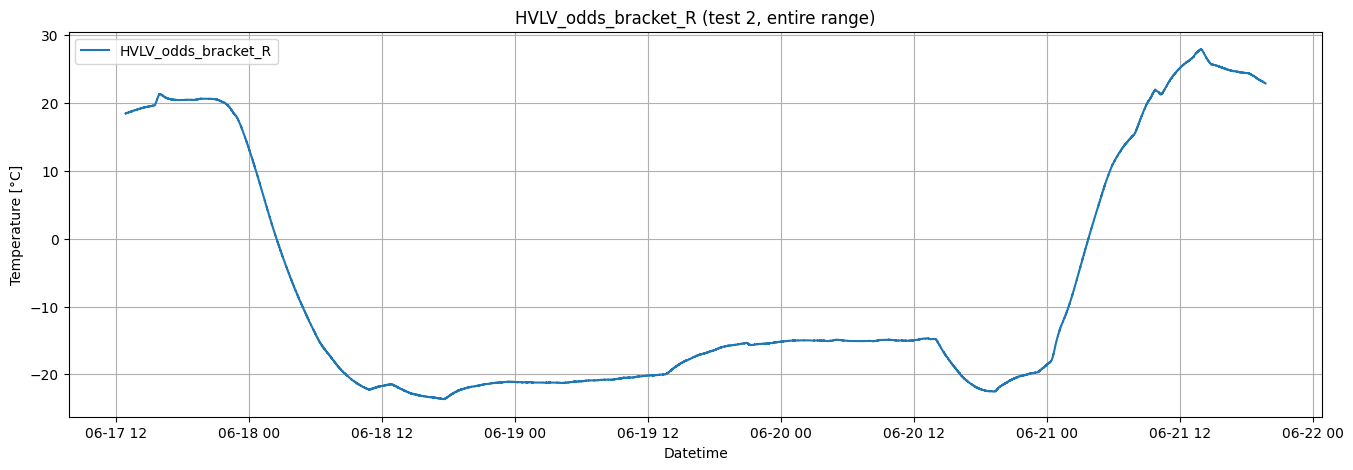

HVLV_odds_main2


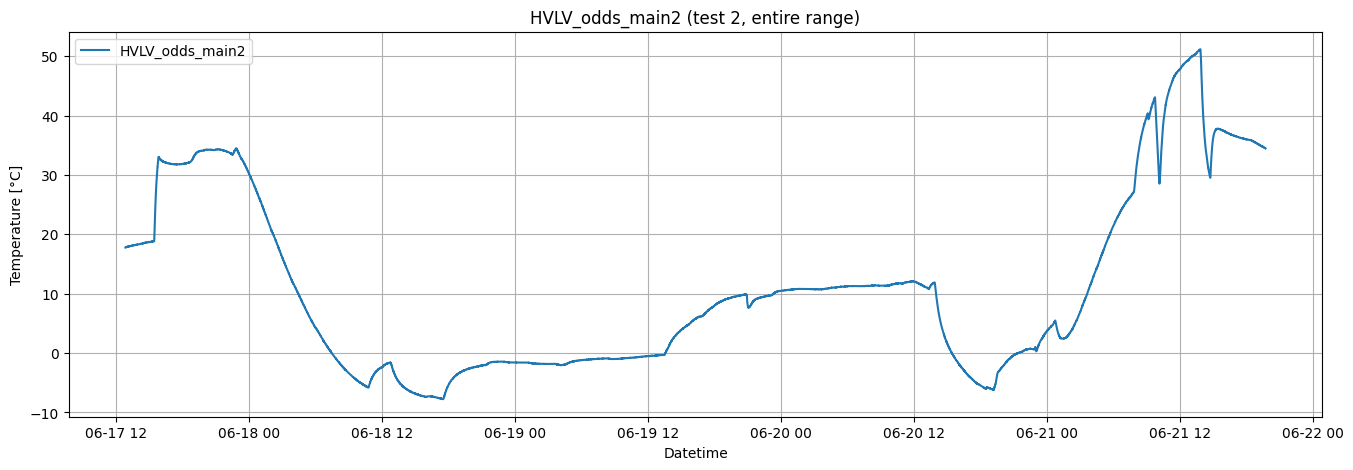

HVLV_odds_LV6-2


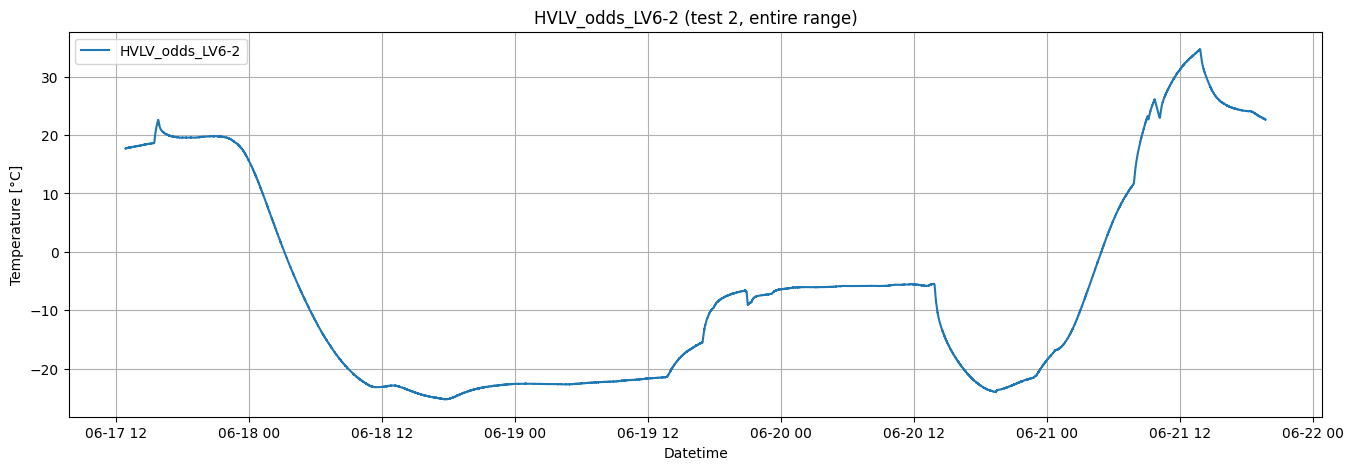

HVLV_odds_LV1-2


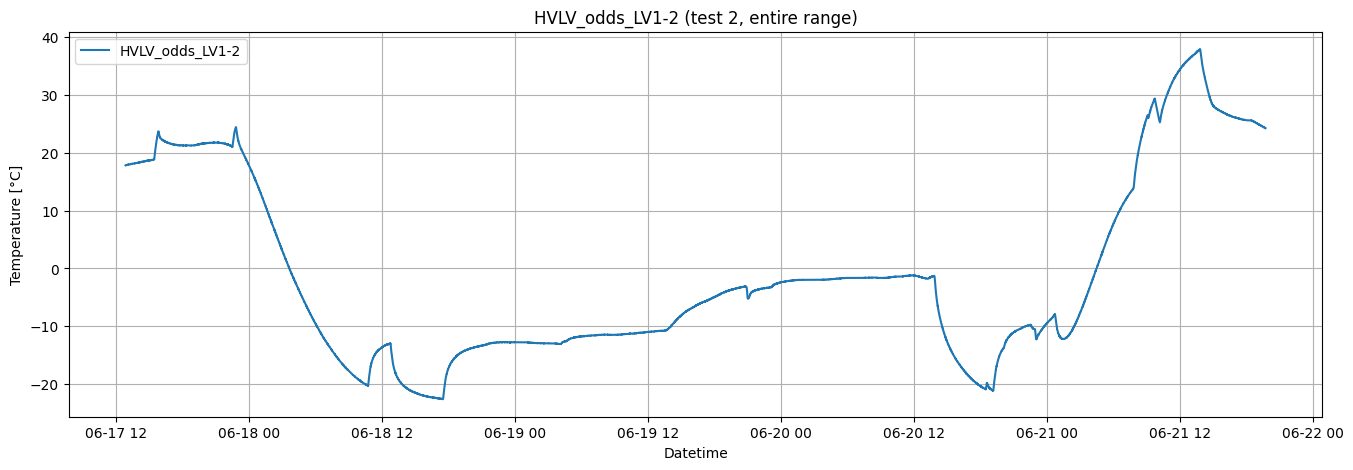

odds_LV1-1


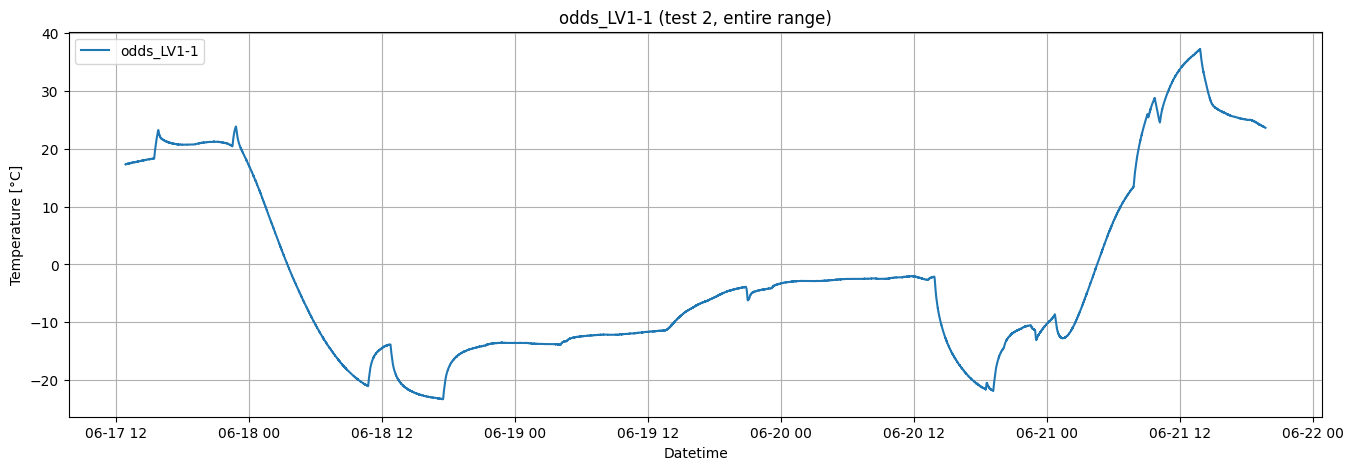

HVLV_odds_A


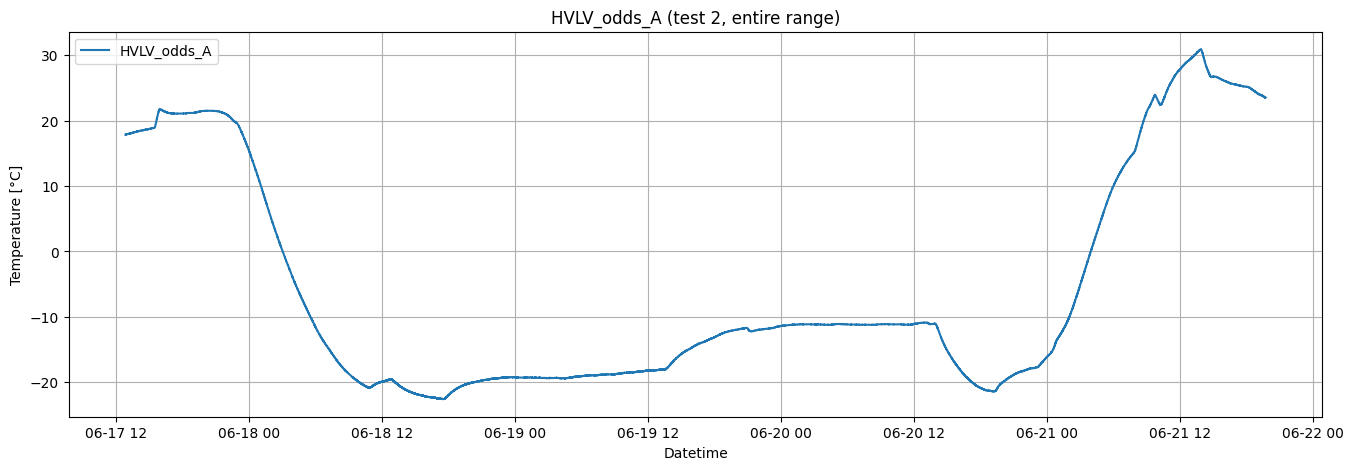

HVLV_odds_B


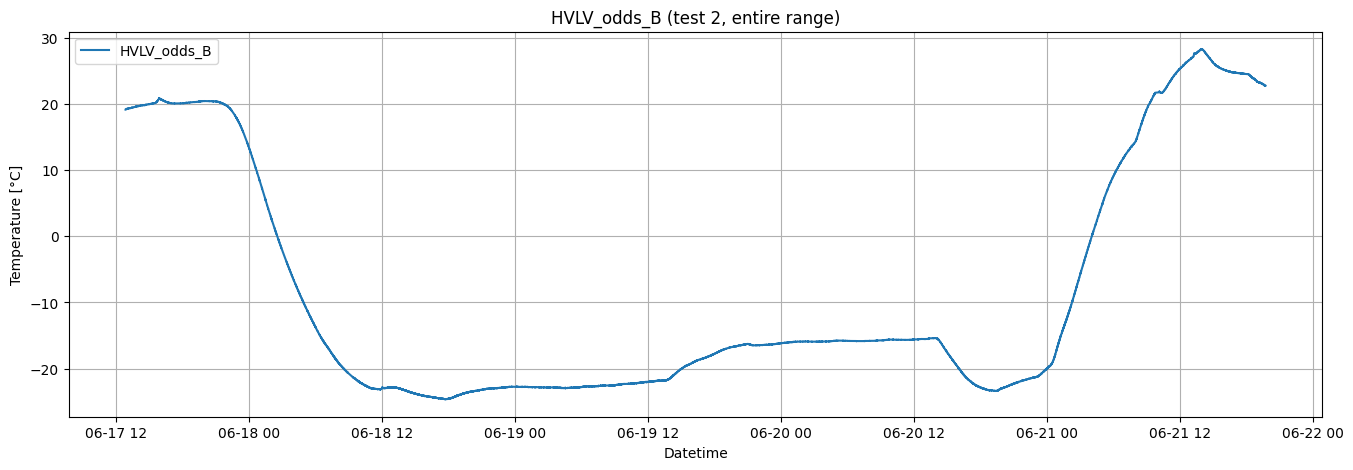

HVLV_even_A


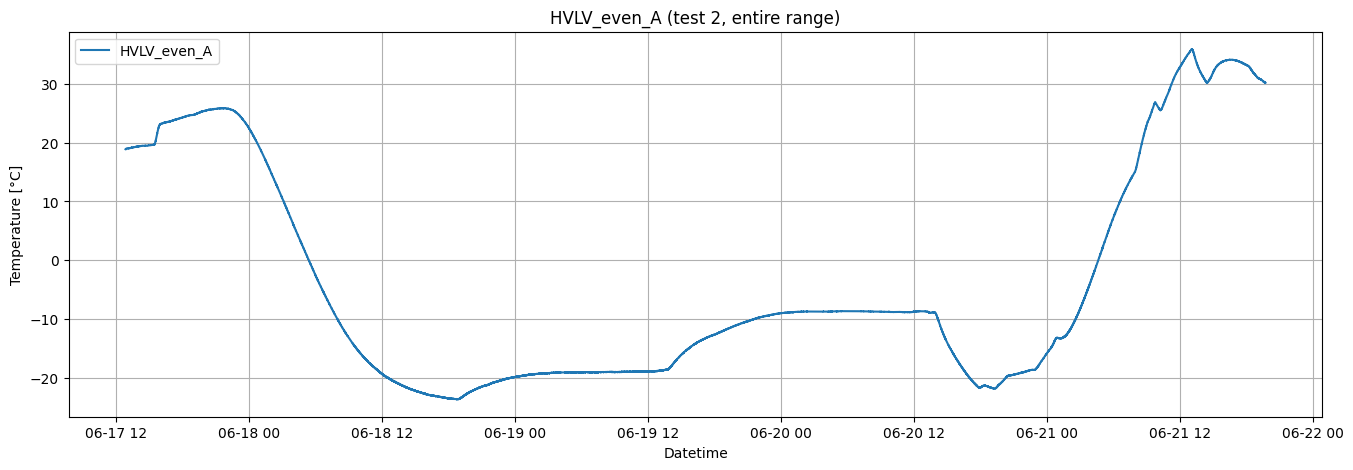

HVLV_even_B


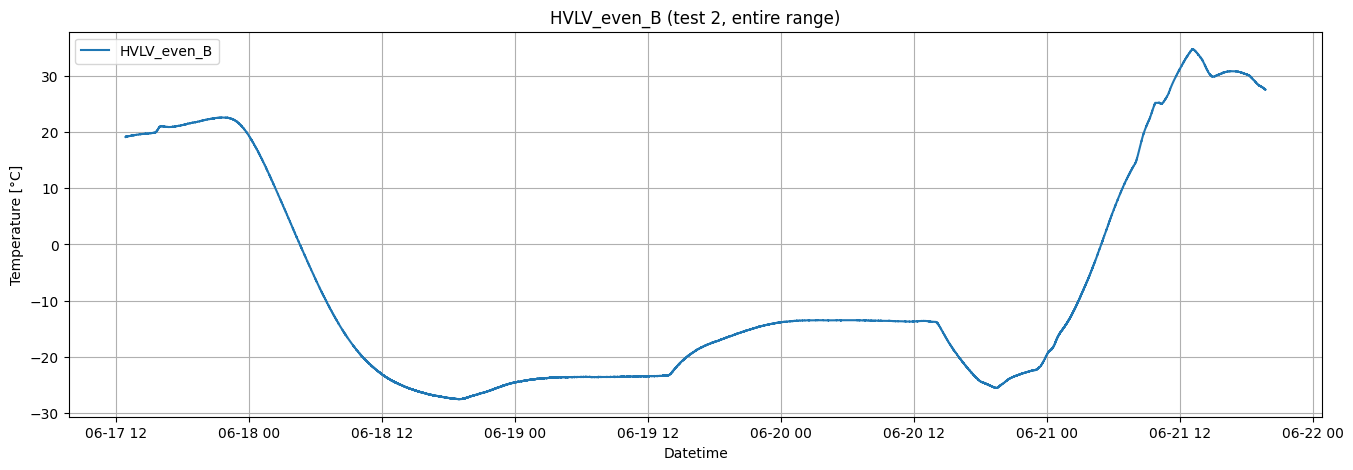

In [22]:
# Plot entire range for all sensors
relative_plots_filepath = r"plots\plots_test_2"

for colname in colnames[1::]:
    plt.clf()
    print(colname)
    plt.plot(datetime_array, temp_converter(data_HVLVPS[(data_HVLVPS.gcutime > min_timestamp) & (data_HVLVPS.gcutime < max_timestamp)].loc[:, colname].to_numpy()), label=colname)
    plt.legend()
    plt.title(colname + " (test 2, entire range)")
    plt.xlabel("Datetime")
    plt.ylabel("Temperature [°C]")
    plt.grid()
    plt.savefig(relative_plots_filepath + "\\" + colname + "_test2.pdf" )
    plt.show()

### Plot dati sensori per il solo hot case (Test 2)

In [52]:
# Plot only hot case for test 2
min_hot_datetime = datetime(2023, 6, 21, 9)
max_hot_datetime = datetime(2023, 6, 21, 13, 25)

min_hot_timestamp = min_hot_datetime.timestamp() 
max_hot_timestamp = max_hot_datetime.timestamp()

print(min_hot_timestamp)
print(max_hot_timestamp)

timestamp_array_hot = data_HVLVPS.gcutime[(data_HVLVPS.gcutime > min_hot_timestamp) & (data_HVLVPS.gcutime < max_hot_timestamp)].to_numpy()

# Array dei datetime
datetime_array_hot = []

# Conversione timestamp to datetime
for i in timestamp_array_hot:
    datetime_array_hot.append([datetime.fromtimestamp(i)])


1687330800.0
1687346700.0


HVLV_evens_bracket_L


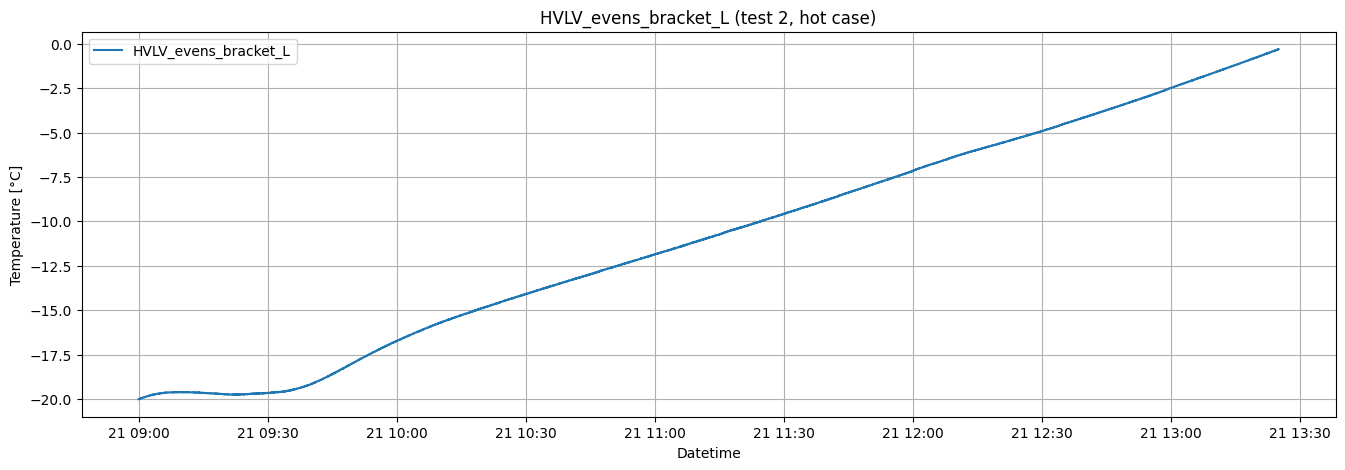

HVLV_evens_bracket_R


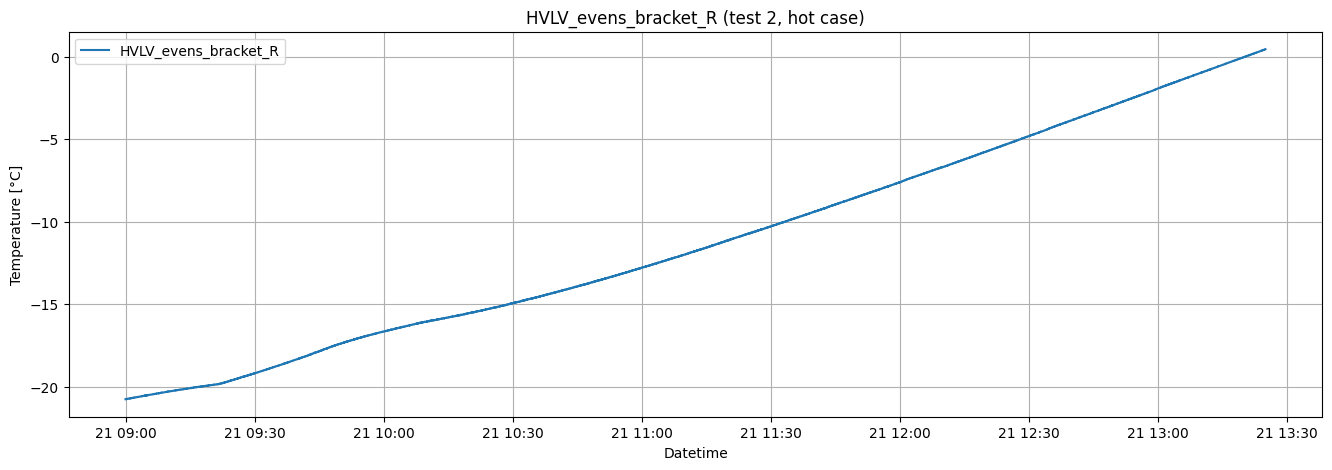

HVLV_evens_LV1-2


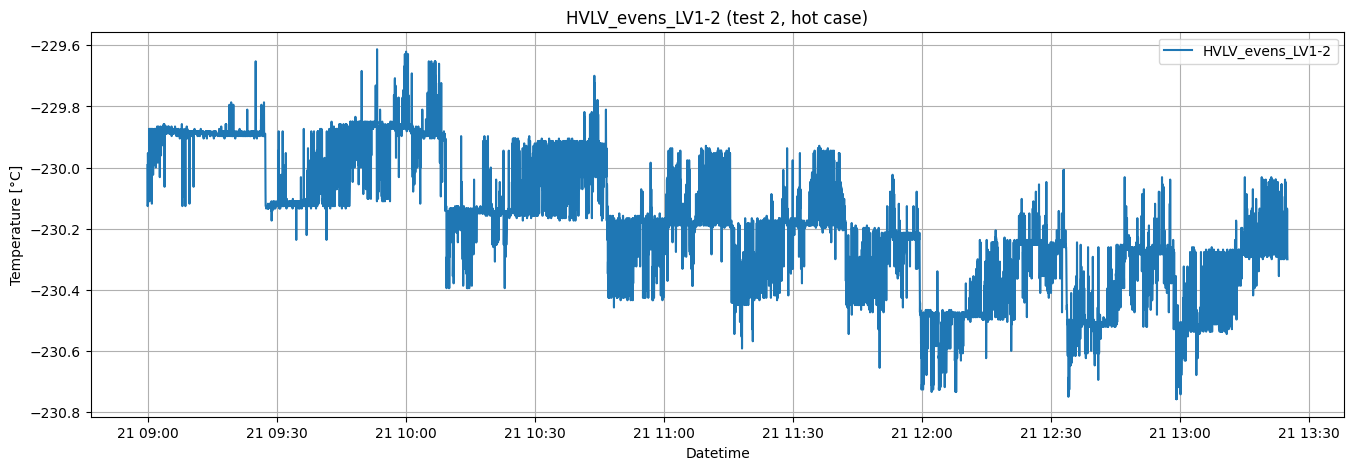

HVLV_HVLV_evens_LV1-1


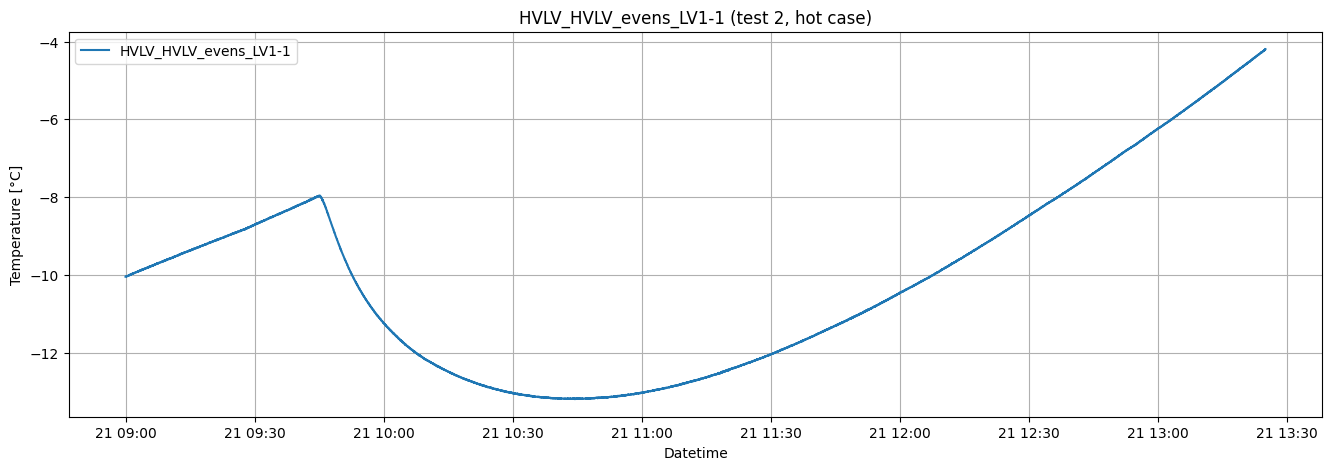

HVLV_oddsHV_1


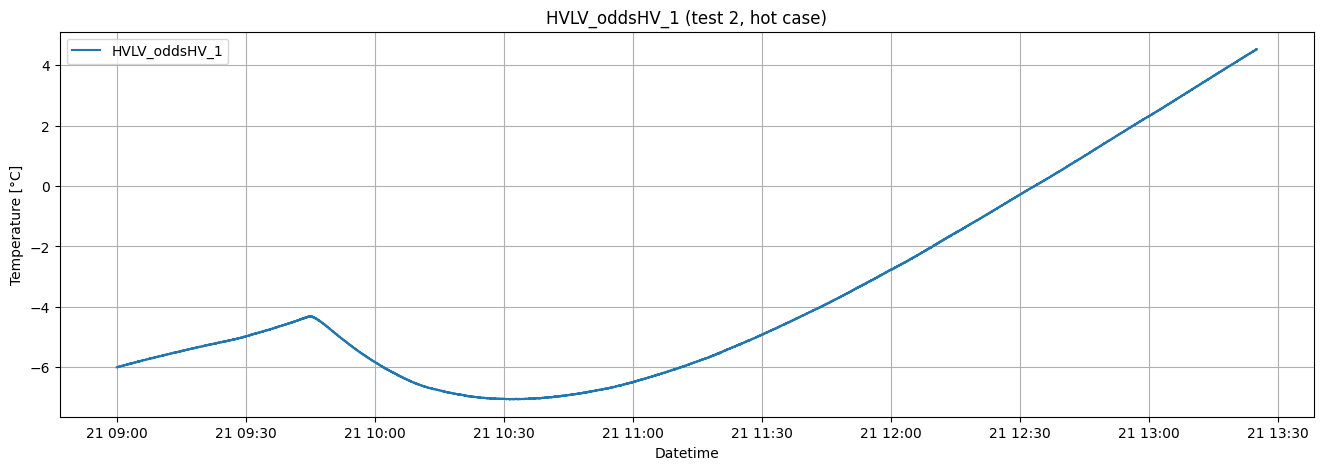

HVLV_odds_LV6-1


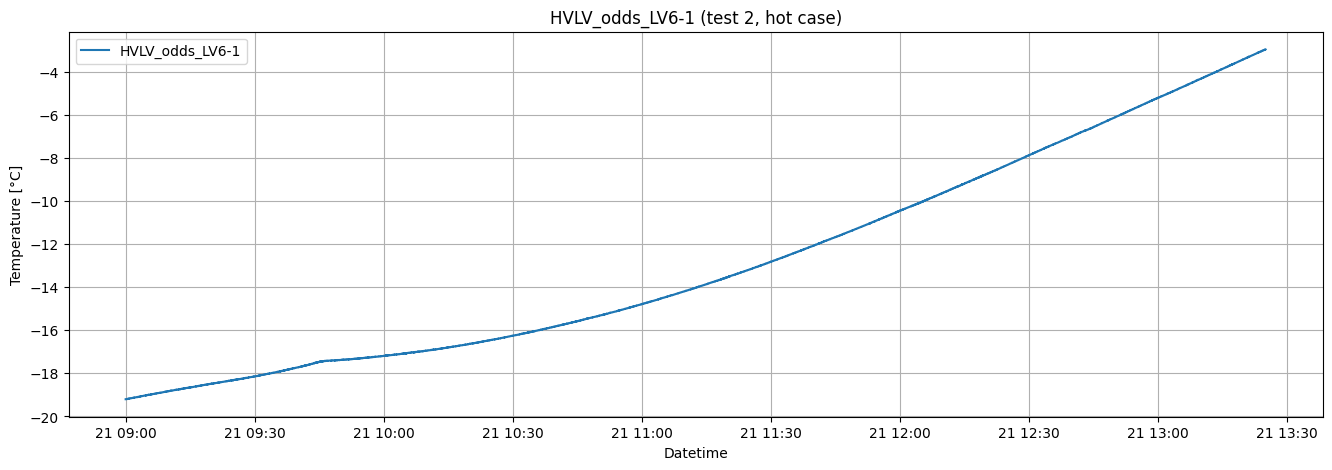

HVLV_odds_bracket_R


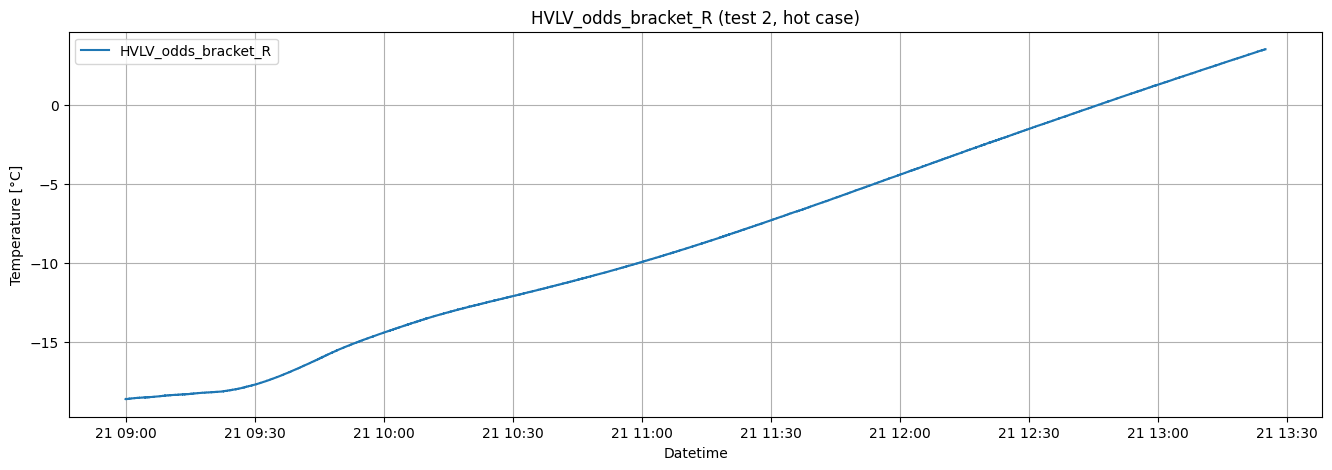

HVLV_odds_main2


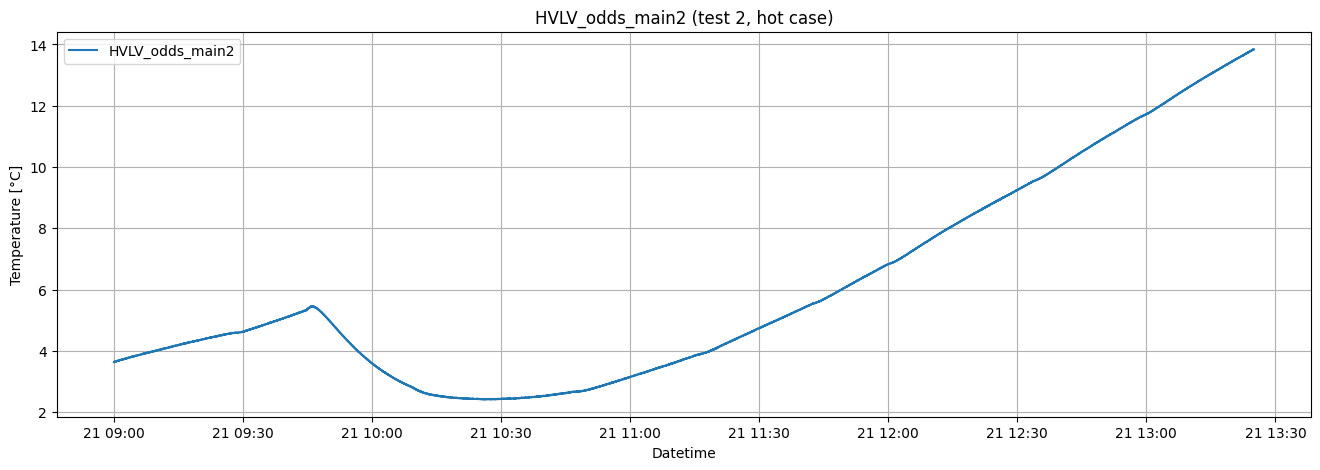

HVLV_odds_LV6-2


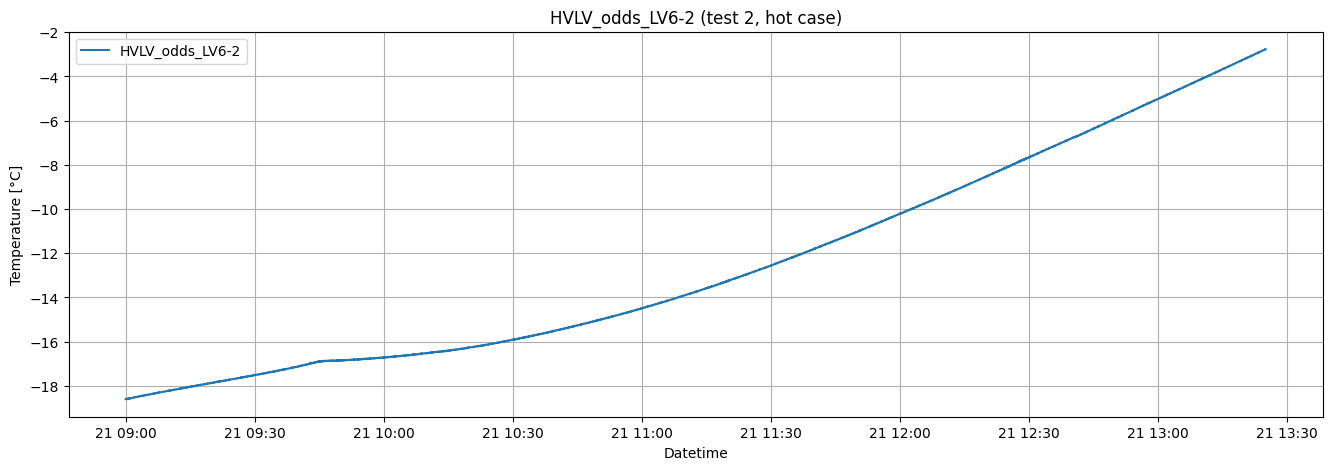

HVLV_odds_LV1-2


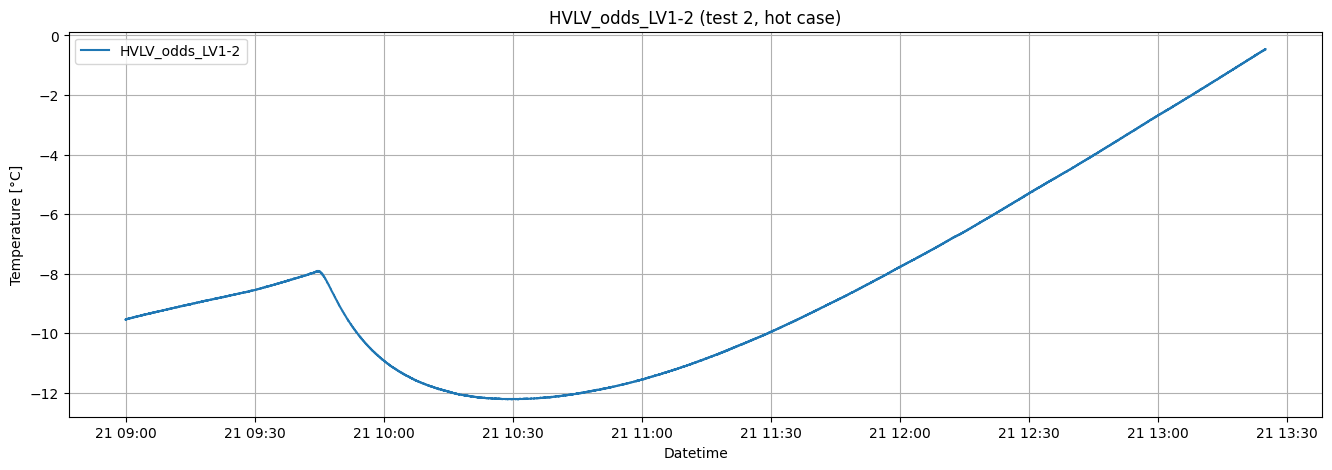

odds_LV1-1


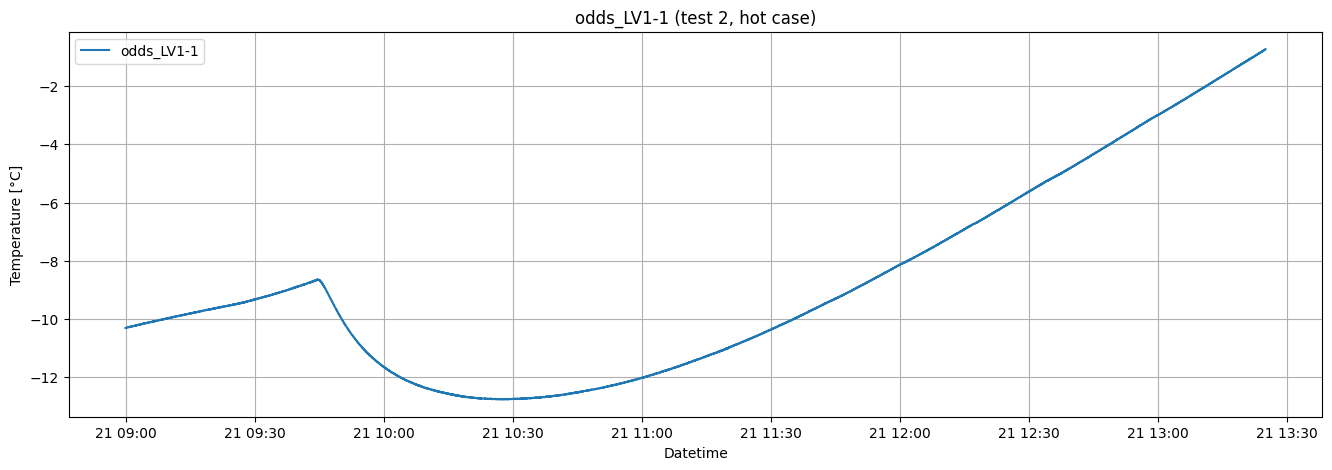

HVLV_odds_A


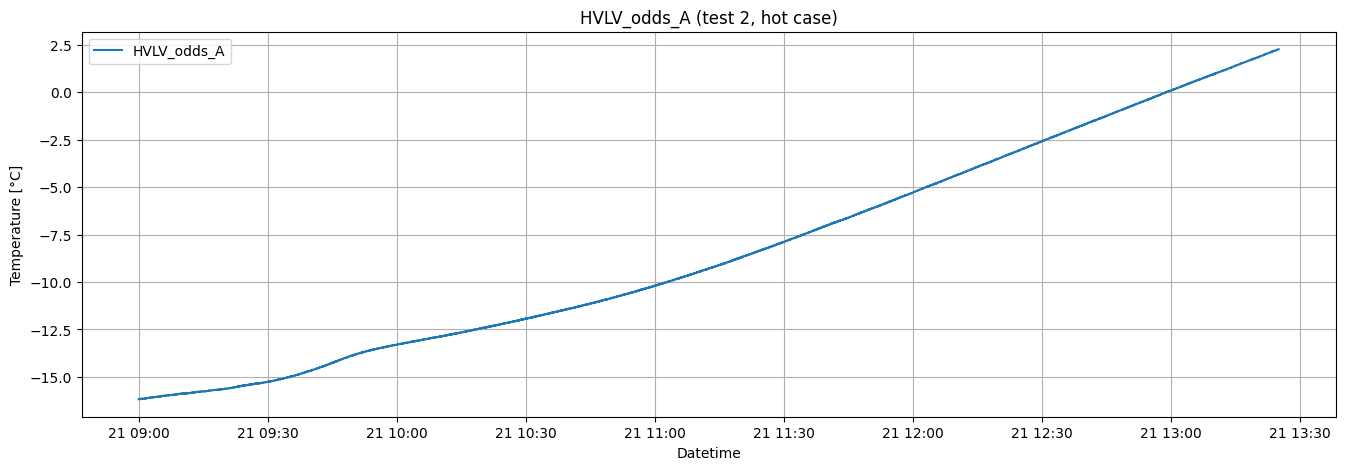

HVLV_odds_B


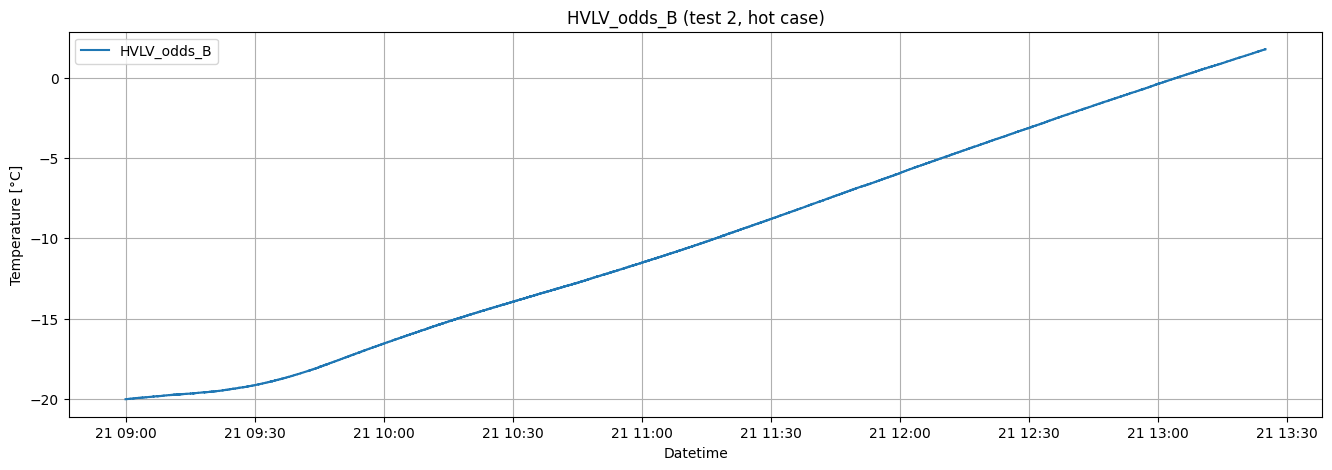

HVLV_even_A


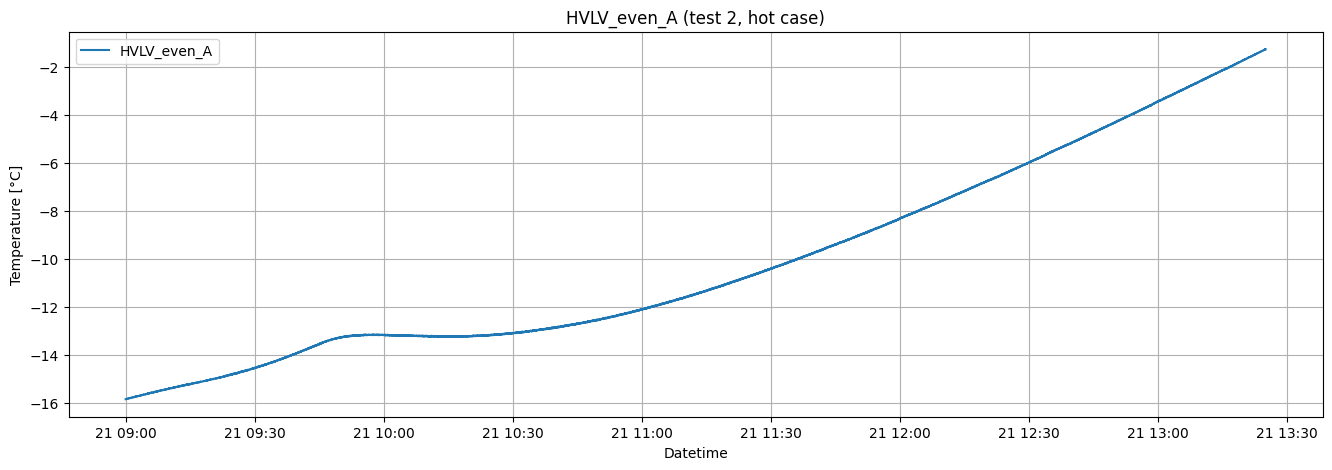

HVLV_even_B


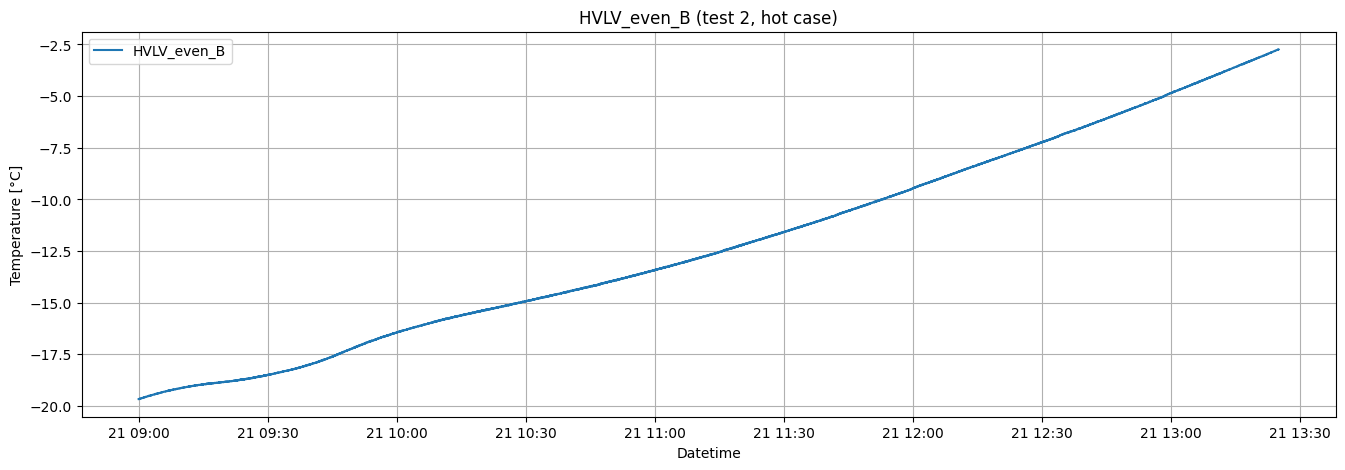

In [53]:
# Plot only hot case
relative_plots_filepath = r"plots\plots_test_2_hot"

for colname in colnames[1::]:
    plt.clf()
    print(colname)
    plt.plot(datetime_array_hot, temp_converter(data_HVLVPS[(data_HVLVPS.gcutime > min_hot_timestamp) & (data_HVLVPS.gcutime < max_hot_timestamp)].loc[:, colname].to_numpy()), label=colname)
    plt.legend()
    plt.title(colname + " (test 2, hot case)")
    plt.xlabel("Datetime")
    plt.ylabel("Temperature [°C]")
    plt.grid()
    plt.savefig(relative_plots_filepath + "\\" + colname + "_test2_hot.pdf")
    plt.show()

### Plot dati sensori per il solo cold case (Test 2)

In [54]:
timestamp_array_cold = data_HVLVPS.gcutime[(data_HVLVPS.gcutime > min_timestamp) & (data_HVLVPS.gcutime < min_hot_timestamp)].to_numpy()

# Array dei datetime
datetime_array_cold = []

# Conversione timestamp to datetime
for i in timestamp_array_cold:
    datetime_array_cold.append([datetime.fromtimestamp(i)])


HVLV_evens_bracket_L


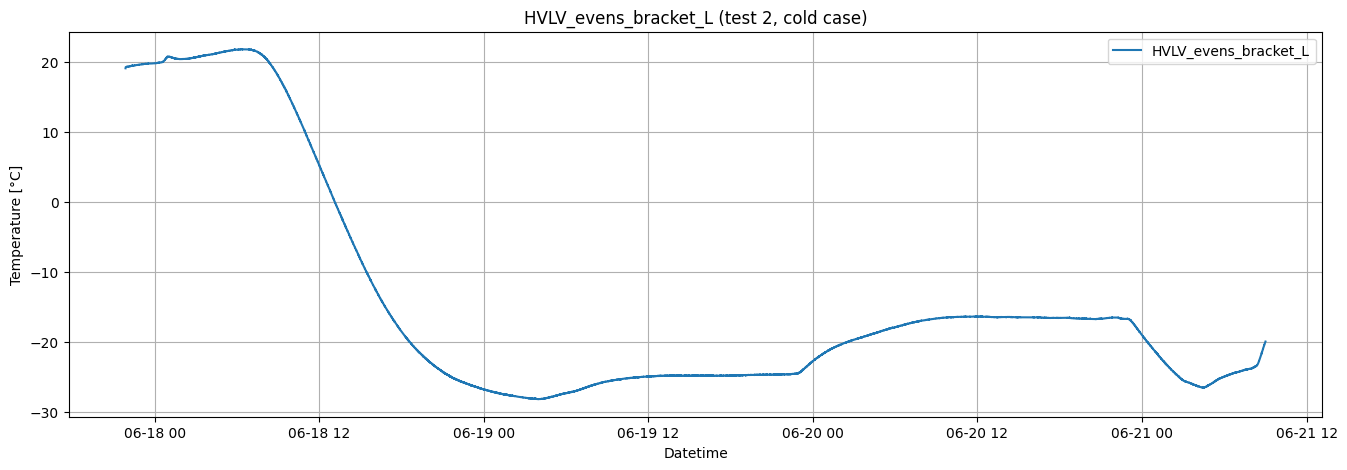

HVLV_evens_bracket_R


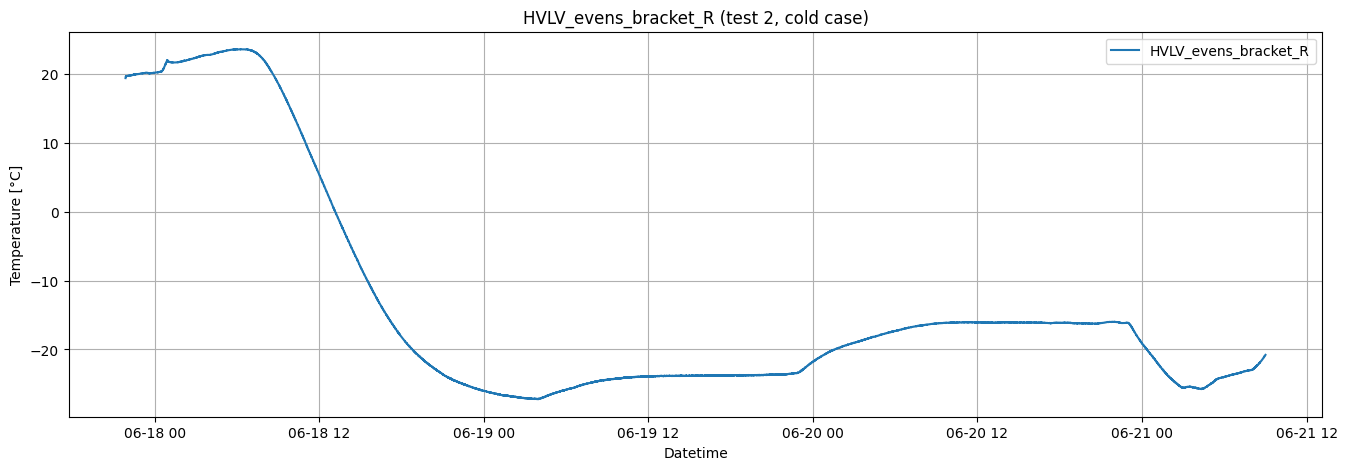

HVLV_evens_LV1-2


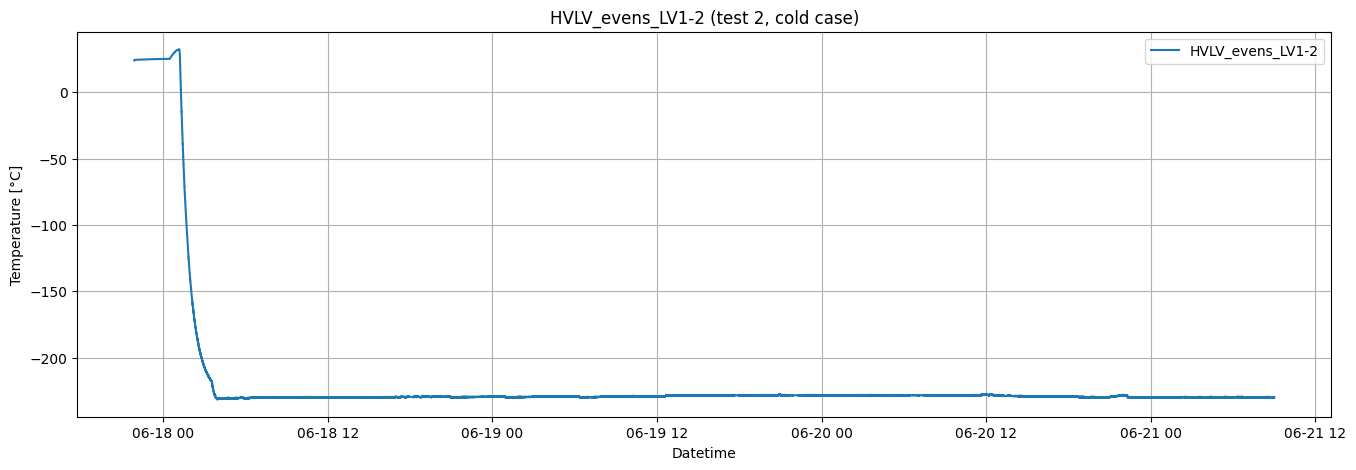

HVLV_HVLV_evens_LV1-1


HVLV_oddsHV_1


HVLV_odds_LV6-1


HVLV_odds_bracket_R


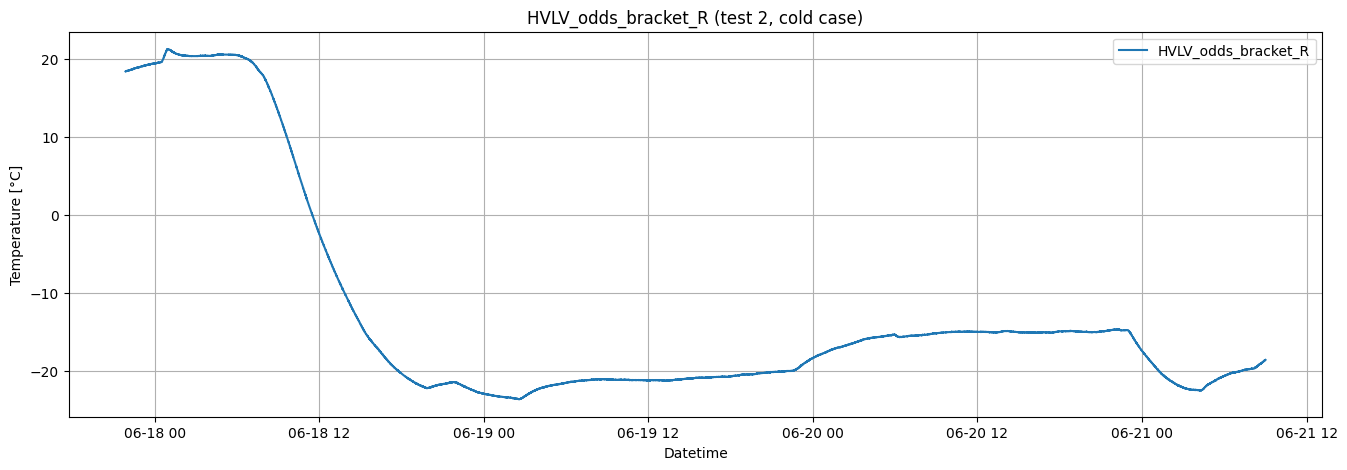

HVLV_odds_main2


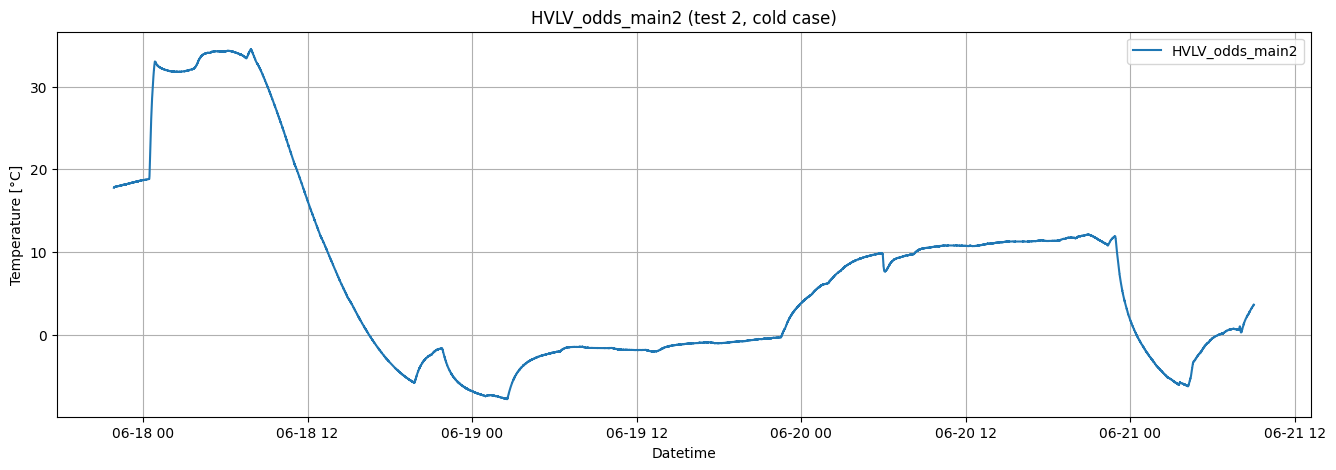

HVLV_odds_LV6-2


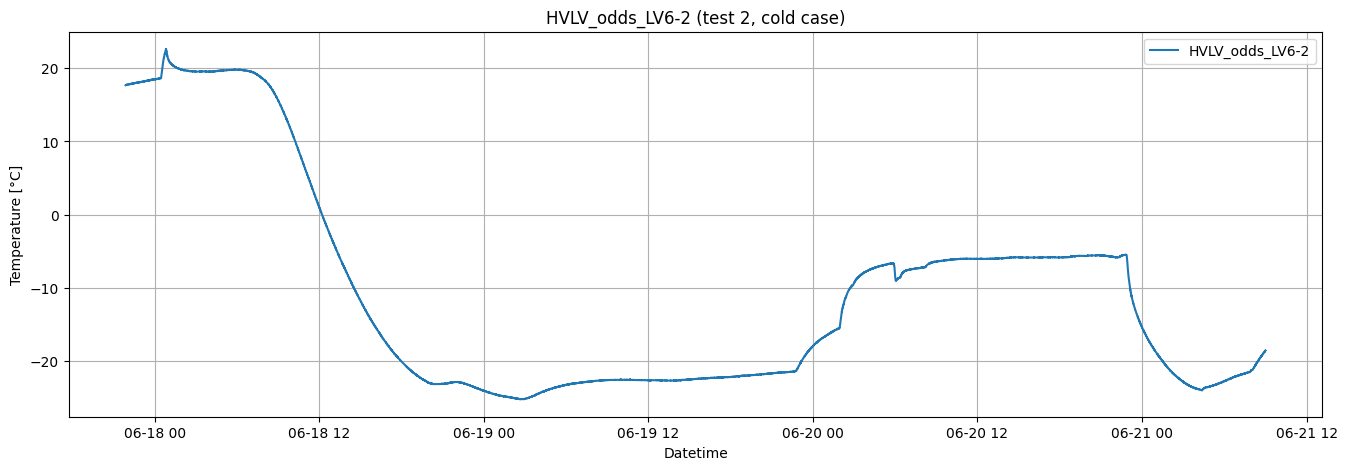

HVLV_odds_LV1-2


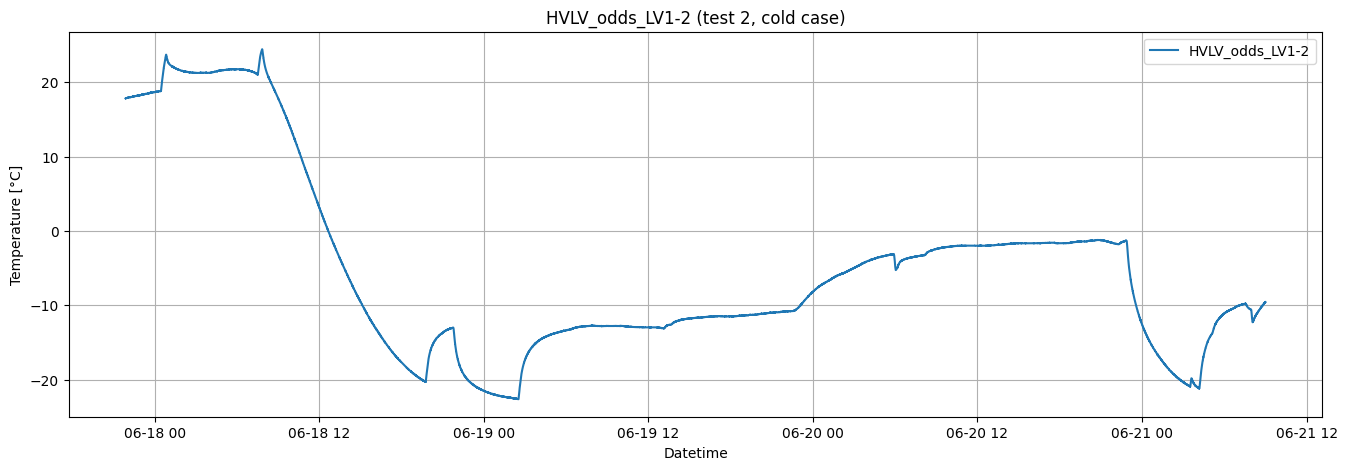

odds_LV1-1


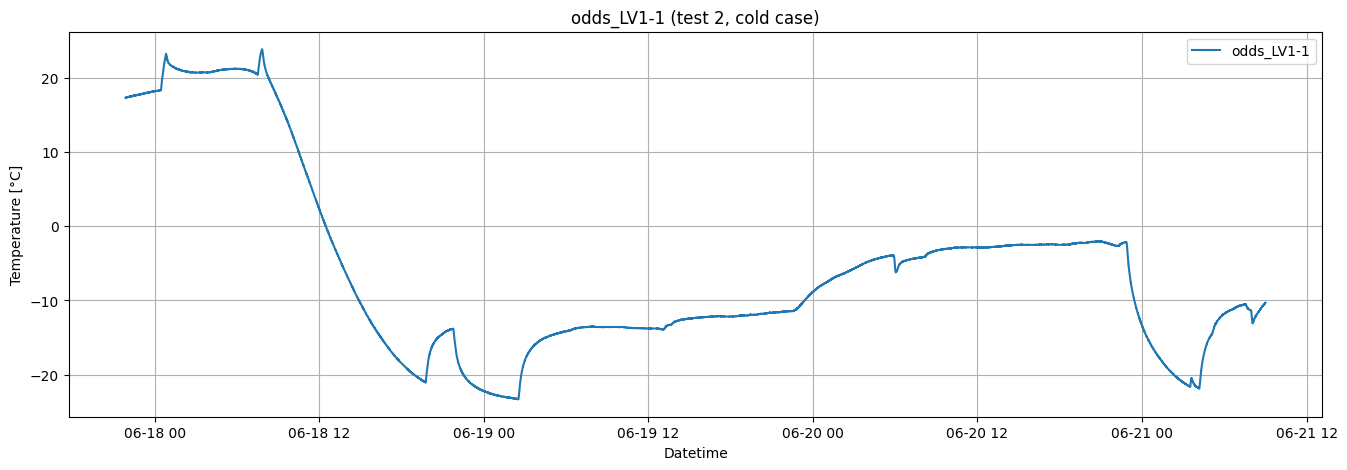

HVLV_odds_A


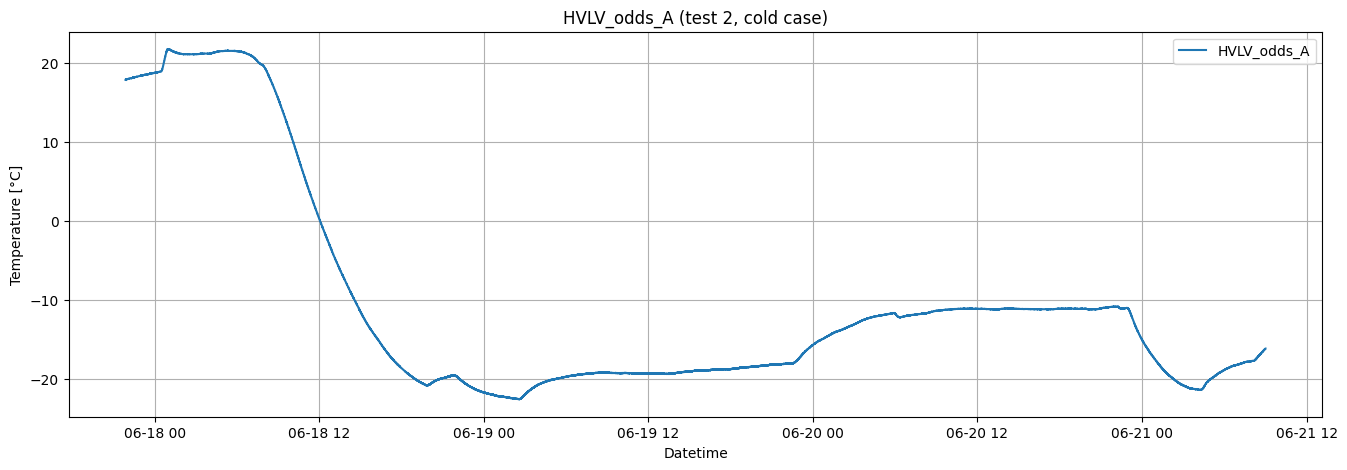

HVLV_odds_B


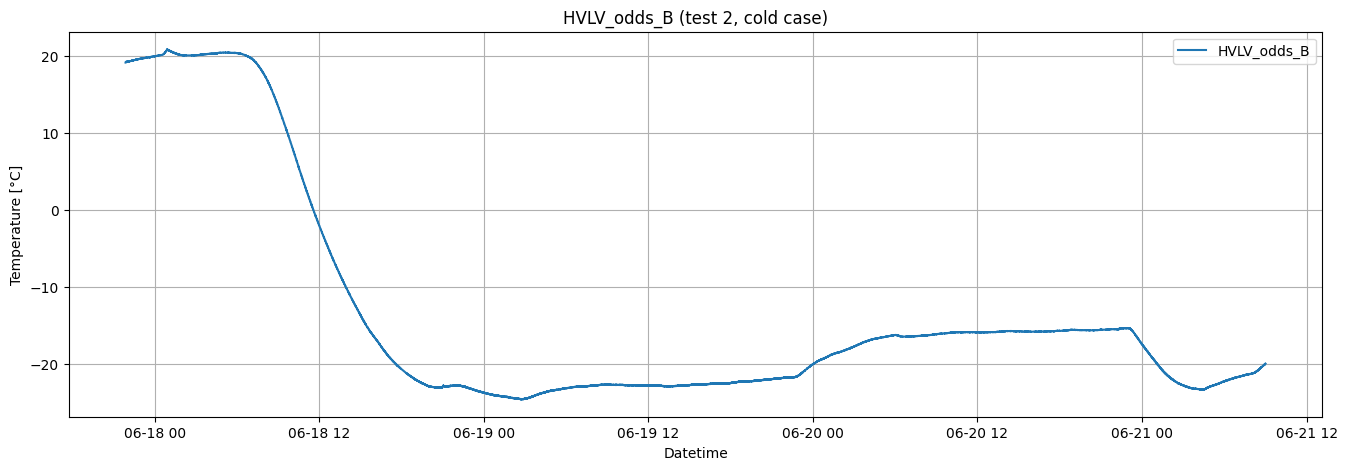

HVLV_even_A


HVLV_even_B


In [55]:
# Plot only cold case
relative_plots_filepath = r"plots\plots_test_2_cold"

for colname in colnames[1::]:
    plt.clf()
    print(colname)
    plt.plot(datetime_array_cold, temp_converter(data_HVLVPS[(data_HVLVPS.gcutime > min_timestamp) & (data_HVLVPS.gcutime < min_hot_timestamp)].loc[:, colname].to_numpy()), label=colname)
    plt.legend()
    plt.title(colname + " (test 2, cold case)")
    plt.xlabel("Datetime")
    plt.ylabel("Temperature [°C]")
    plt.grid()
    plt.savefig(relative_plots_filepath + "\\" + colname + "_test2_cold.pdf")
    plt.show()